<a href="https://colab.research.google.com/github/dgamorimm/fraud_detector/blob/main/Detect_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1

## Colab e Kaggle

Nós vamos usar uma base de dados do Kaggle chamada [Fraud Detection Example](https://www.kaggle.com/gopalmahadevan/fraud-detection-example) e ela tem uma fração de dados do [PaySim](https://github.com/EdgarLopezPhD/PaySim), um simulador de dados financeiros feito exatamente para detecção de fraude.

**Variáveis do dataset**

**step** - mapeia uma unidade de tempo no mundo real. Neste caso, 1 passo é 1 hora de tempo. Total de etapas 744 (simulação de 30 dias).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
(caixa-de-entrada, caixa-de-saida, débito, pagamento e transferência)

**amount** - valor da transação em moeda local.

**nameOrig** - cliente que iniciou a transação

**oldbalanceOrg** - saldo inicial antes da transação

**newbalanceOrig** - novo saldo após a transação

**nameDest** - cliente que é o destinatário da transação

**oldbalanceDest** - destinatário do saldo inicial antes da transação.
Observe que não há informações para clientes que começam com M (Comerciantes).

**newbalanceDest** - novo destinatário do saldo após a transação. Observe que não há informações para clientes que começam com M (Comerciantes).

**isFraud** - São as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e depois sacando do sistema.

**isFlaggedFraud** - O modelo de negócios visa controlar transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.


# Aula 2

## Análise com Pandas

In [56]:
import pandas as pd

In [57]:
df = pd.read_csv('/content/fraud_dataset_example.csv')
df

step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
101608    10   PAYMENT     7477.02   C513257306         785.00   
101609    10  CASH_OUT   282252.35   C210473293      220339.29   
101610    10   PAYMENT    17289.01   C807582280           0.00   
101611    10  TRANSFER  1347146.45  C1315779140        1605.00   
101612    10  CASH_OUT   469539.21   C515691325       31133.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155            0.00            0.00        0   
1             19384.72  M2044282225            0.00            0.00        0   
2                 0.00   C553264065            0.00            0.00        1   
3                 0.00    C38997010        21182.00            0.00        1   
4             29885.86  M1230701703            0.00            0.00        0   
...                ...          ...             ...             ...      ...   
101608            0.00   M524833426            0.00            0.00        0   
101609            0.00  C1172042998        95156.01        91286.97        0   
101610            0.00   M334249577            0.00            0.00        0   
101611            0.00  C1631408038       541639.43      2186953.43        0   
101612            0.00  C1383702768            0.00       469539.21        0   

        isFlaggedFraud  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
101608               0  
101609               0  
101610               0  
101611               0  
101612               0  

[101613 rows x 11 columns]

In [58]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Trazendo as colunas de fraude para o começo do dataset

In [59]:
df = df [['isFraud', 'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df.head()

isFraud  isFlaggedFraud  step      type    amount     nameOrig  \
0        0               0     1   PAYMENT   9839.64  C1231006815   
1        0               0     1   PAYMENT   1864.28  C1666544295   
2        1               0     1  TRANSFER    181.00  C1305486145   
3        1               0     1  CASH_OUT    181.00   C840083671   
4        0               0     1   PAYMENT  11668.14  C2048537720   

   oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  
0       170136.0       160296.36  M1979787155             0.0             0.0  
1        21249.0        19384.72  M2044282225             0.0             0.0  
2          181.0            0.00   C553264065             0.0             0.0  
3          181.0            0.00    C38997010         21182.0             0.0  
4        41554.0        29885.86  M1230701703             0.0             0.0

### Renomeando as colunas

Criando um dicionário
```
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}
```

In [60]:
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}

In [61]:
df = df.rename(columns=colunas)
df.head()

fraude  super_fraude  tempo      tipo     valor     cliente1  \
0       0             0      1   PAYMENT   9839.64  C1231006815   
1       0             0      1   PAYMENT   1864.28  C1666544295   
2       1             0      1  TRANSFER    181.00  C1305486145   
3       1             0      1  CASH_OUT    181.00   C840083671   
4       0             0      1   PAYMENT  11668.14  C2048537720   

   saldo_inicial_c1  novo_saldo_c1     cliente2  saldo_inicial_c2  \
0          170136.0      160296.36  M1979787155               0.0   
1           21249.0       19384.72  M2044282225               0.0   
2             181.0           0.00   C553264065               0.0   
3             181.0           0.00    C38997010           21182.0   
4           41554.0       29885.86  M1230701703               0.0   

   novo_saldo_c2  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

In [62]:
df.describe()

fraude  super_fraude          tempo         valor  \
count  101613.000000      101613.0  101613.000000  1.016130e+05   
mean        0.001142           0.0       8.523457  1.740901e+05   
std         0.033768           0.0       1.820681  3.450199e+05   
min         0.000000           0.0       1.000000  3.200000e-01   
25%         0.000000           0.0       8.000000  1.001659e+04   
50%         0.000000           0.0       9.000000  5.338541e+04   
75%         0.000000           0.0      10.000000  2.124984e+05   
max         1.000000           0.0      10.000000  1.000000e+07   

       saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  novo_saldo_c2  
count      1.016130e+05   1.016130e+05      1.016130e+05   1.016130e+05  
mean       9.071753e+05   9.234992e+05      8.810428e+05   1.183998e+06  
std        2.829575e+06   2.867319e+06      2.399949e+06   2.797761e+06  
min        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
25%        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
50%        2.019047e+04   0.000000e+00      2.105800e+04   5.178343e+04  
75%        1.947150e+05   2.192178e+05      5.919217e+05   1.063122e+06  
max        3.893942e+07   3.894623e+07      3.400874e+07   3.894623e+07

### Outras informações do dataset

O método describe() fornece as informações sobre:

**count** - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

**mean** - O valor médio, em média aritmética. Como ele faz uma média aritmética nem sempre mostra a realidade da maior parte dos casos do banco de dados.

**std** - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

**min** e **max** - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

**quartis** - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

Para saber mais sobre esse método, acesse o artigo [Ampliando a análise com o Describe](https://www.alura.com.br/artigos/ampliando-a-analise-com-describe).


In [63]:
df.describe().T

count          mean           std   min       25%  \
fraude            101613.0  1.141586e-03  3.376824e-02  0.00      0.00   
super_fraude      101613.0  0.000000e+00  0.000000e+00  0.00      0.00   
tempo             101613.0  8.523457e+00  1.820681e+00  1.00      8.00   
valor             101613.0  1.740901e+05  3.450199e+05  0.32  10016.59   
saldo_inicial_c1  101613.0  9.071753e+05  2.829575e+06  0.00      0.00   
novo_saldo_c1     101613.0  9.234992e+05  2.867319e+06  0.00      0.00   
saldo_inicial_c2  101613.0  8.810428e+05  2.399949e+06  0.00      0.00   
novo_saldo_c2     101613.0  1.183998e+06  2.797761e+06  0.00      0.00   

                       50%         75%          max  
fraude                0.00        0.00         1.00  
super_fraude          0.00        0.00         0.00  
tempo                 9.00       10.00        10.00  
valor             53385.41   212498.40  10000000.00  
saldo_inicial_c1  20190.47   194715.00  38939424.03  
novo_saldo_c1         0.00   219217.76  38946233.02  
saldo_inicial_c2  21058.00   591921.70  34008736.98  
novo_saldo_c2     51783.43  1063121.64  38946233.02

In [64]:
df.shape

(101613, 11)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


### Verificando a variável target

In [66]:
df.groupby('fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

In [67]:
df.isnull().values.any()

False

## Encoding

### Pandas Profiling

Instalando o Pandas Profiling

```!pip install -U pandas-profiling```

In [68]:
!pip install ydata-profiling

In [69]:
from ydata_profiling import ProfileReport

ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Aplicando o Encoding

#### **Tipos de encoding**

**Label Encoding** - Renomea as classes com valores numéricos de 1 a **n**, sendo n o número de classes. Pode existir hierarquia entre as classes.

**One-Hot Encoding** - Transforma as variáveis em **n** colunas binárias, sendo n o número de classes. Todas as classes são analisadas de forma igual, quando tiver a ocorrência dela a coluna terá o valor 1 e quando não o valor 0, isso acontece para as demais colunas criadas.



In [70]:
df = pd.get_dummies(data=df, columns=['tipo'])
df.head()

fraude  super_fraude  tempo     valor     cliente1  saldo_inicial_c1  \
0       0             0      1   9839.64  C1231006815          170136.0   
1       0             0      1   1864.28  C1666544295           21249.0   
2       1             0      1    181.00  C1305486145             181.0   
3       1             0      1    181.00   C840083671             181.0   
4       0             0      1  11668.14  C2048537720           41554.0   

   novo_saldo_c1     cliente2  saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  \
0      160296.36  M1979787155               0.0            0.0         False   
1       19384.72  M2044282225               0.0            0.0         False   
2           0.00   C553264065               0.0            0.0         False   
3           0.00    C38997010           21182.0            0.0         False   
4       29885.86  M1230701703               0.0            0.0         False   

   tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0          False       False          True          False  
1          False       False          True          False  
2          False       False         False           True  
3           True       False         False          False  
4          False       False          True          False

#### Removendo variáveis

In [71]:
df = df.drop(['cliente1', 'cliente2', 'super_fraude'], axis=1)
df

fraude  tempo       valor  saldo_inicial_c1  novo_saldo_c1  \
0            0      1     9839.64         170136.00      160296.36   
1            0      1     1864.28          21249.00       19384.72   
2            1      1      181.00            181.00           0.00   
3            1      1      181.00            181.00           0.00   
4            0      1    11668.14          41554.00       29885.86   
...        ...    ...         ...               ...            ...   
101608       0     10     7477.02            785.00           0.00   
101609       0     10   282252.35         220339.29           0.00   
101610       0     10    17289.01              0.00           0.00   
101611       0     10  1347146.45           1605.00           0.00   
101612       0     10   469539.21          31133.00           0.00   

        saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  \
0                   0.00           0.00         False          False   
1                   0.00           0.00         False          False   
2                   0.00           0.00         False          False   
3               21182.00           0.00         False           True   
4                   0.00           0.00         False          False   
...                  ...            ...           ...            ...   
101608              0.00           0.00         False          False   
101609          95156.01       91286.97         False           True   
101610              0.00           0.00         False          False   
101611         541639.43     2186953.43         False          False   
101612              0.00      469539.21         False           True   

        tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0            False          True          False  
1            False          True          False  
2            False         False           True  
3            False         False          False  
4            False          True          False  
...            ...           ...            ...  
101608       False          True          False  
101609       False         False          False  
101610       False          True          False  
101611       False         False           True  
101612       False         False          False  

[101613 rows x 12 columns]

# Aula 3

## Regressão Logística

In [72]:
x = df.drop('fraude', axis=1)
y = df['fraude']

In [73]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)

lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
# max_iter = máximo de iterações que ele vai rodar no conjunto e também para não ter problemas de convergência

# quando tem uma acurácia, porém um F1 score baixo, quer dizer que não tem relevância a acurácia
# quando tem a acurácia e o f1 score alto, quer dizer que o nosso modelo esta bom

Acurácia: 0.9989765391276965
Precisão: 0.2
Recall: 0.043478260869565216
F1: 0.07142857142857142


Supreendentemente, a nossa acurácia ficou bem alta: 0.99. Isso é muito bom! Significa que o nosso modelo, em termos gerais, está acertando bastante. Porém, as nossas outras métricas estão um pouco baixas. A nossa precisão, que é a métrica que avalia a quantidade de verdadeiros positivos, ou seja, quantas vezes a fraude está acertando, está um pouco baixa: 0.2. Então, precisamos avaliar melhor o que está acontecendo.

O Recall diz respeito à nossa sensibilidade, à nossa reevocação. Ele avalia a capacidade do modelo classificar corretamente as classes, sejam elas fraudes ou não, 0 ou 1. Se temos um valor de 0.4, quer dizer que não estamos acertando tão bem.

Também temos o f1_score, que é a média harmônica entre a nossa precisão e o nosso recall. Um ponto interessante é que quando temos uma acurácia muito alta e um F1 muito baixo, é sinal de que, talvez, a nossa acurácia não seja tão confiável. Por outro lado, se temos uma acurácia alta e um f1_score alto, significa que o nosso resultado é relevante.

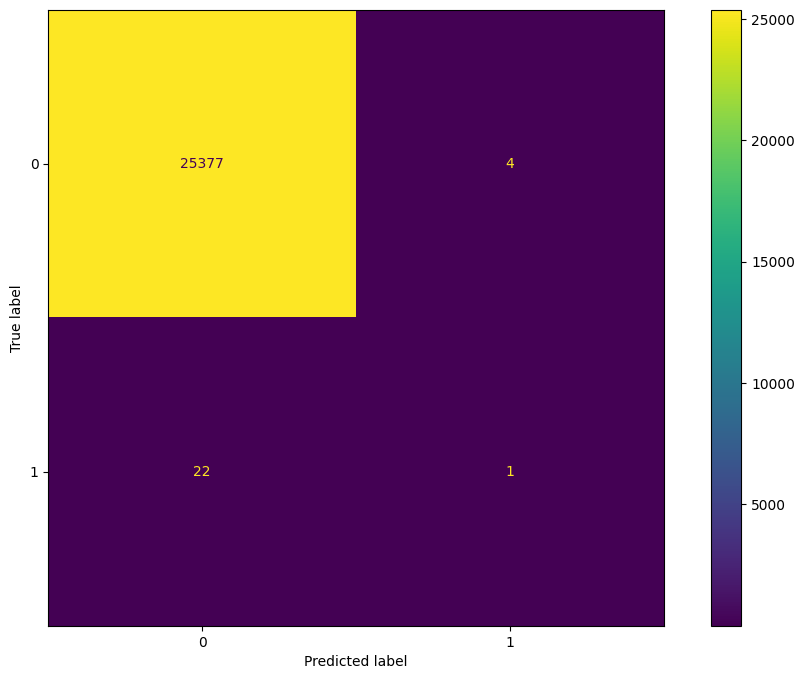

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Do lado esquerdo, os valores marcados com zero seriam os nossos verdadeiros negativos, são as partes que não são fraudes e estão acertando muito, porém, o verdadeiro positivo acertou apenas uma vez. Algo diferente, portanto, está acontecendo: ele está acertando muito em uma classe e pouco em outra. Os outros valores estão bem baixos.

Apesar de não sabermos exatamente o que está acontecendo, podemos arriscar um palpite. Nós estudamos anteriormente que as classes estão um pouco desbalanceadas, a classe majoritária era a classe de mais valores que não são fraude, mas também podemos avaliar o nosso modelo com outra métrica que a Curva Roc.

Com a Curva Roc conseguimos validar o modelo em si. Ela é característica de operação do receptor e se trata de uma curva que se aproxima do valor 1. Nós vamos avaliá-la considerando quão próxima está do valor 1. Além disso, ela trará outra métrica junto que é a AUC (Are Under the Curve) ou Área sob a curva.

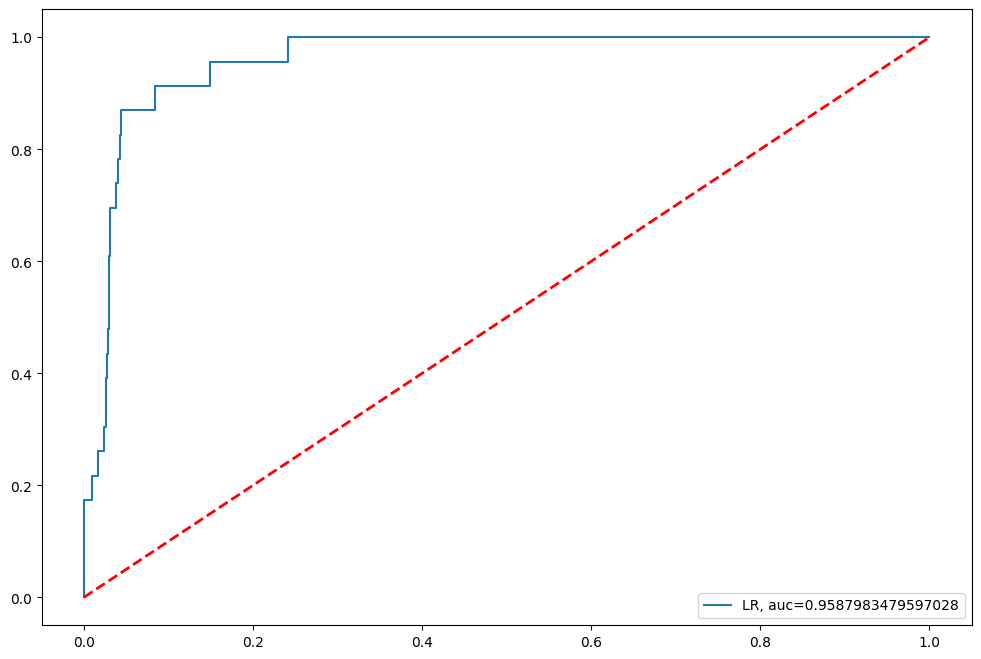

In [76]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

Na Curva Roc, quanto mais perto de 1 fica a curva azul fica, melhor ela é. Quanto mais rápido ela chega no valor 1 do eixo y, melhor. É possível notar que a subida da curva azul está um pouco estranha, quadrada. Até (0.2, 1.0) ela ainda está tentando se estabilizar, a partir desse ponto ela se estabiliza e chega até o ponto de estabilização que é o 1, ao final.

Mas, ela está com uma curva de AUC boa, com valor de 0.958. A nossa acurácia está boa, mas as nossas outras métricas, não. Provavelmente isso está acontecendo, porque as nossas classes estão desbalanceadas, o que atrapalha os nossos modelos e o trabalho com as classes. Precisamos corrigir esse problema para que esse e os modelos futuros tenham um desempenho melhor quanto às nossas métricas.

## Balanceamento de dados

A nossa base de dados está completamente desbalanceada. Anteriormente, detectamos 116 dados de fraude, mas não sabíamos qual seria o efeito disso em um modelo de machine learning. O efeito foi bem ruim e precisamos fazer algo para resolvermos esse problema.

Existem dois tipos possíveis de balanceamento de dados: o `undersampling` e o `oversampling`. A primeira opção, undersampling, reduz todos os dados da nossa opção majoritária, isto é, de não fraude, para 116 dados, o que não faz tanto sentido no nosso caso, considerando que já não temos muitos dados de fraude e não teríamos tantos dados para treinamento. Seria complicado continuar fazendo as nossas análises e elas não trariam uma boa acurácia.

A segunda opção, oversampling, é basicamente duplicar, fazer a cópia dos nossos dados da classe minoritária até chegar no valor da classe majoritária. Então, ela faria cópia dos dados de fraude, ou seja, criaria novos dados até chegarmos ao número de dados de não fraude.

O oversampling apresenta alguns problemas quando tratamos de uma base de dados do mundo real, por exemplo, se tivéssemos utilizando a base de dados de um banco. Nesse caso, teríamos clientes reais e criaríamos dados sintéticos que trariam algum problema para as análises.

Não teríamos certeza sobre os comportamentos dos clientes. Existem outros casos que podemos analisar com o oversampling, mas como já estamos trabalhando com uma base de dados sintéticos, não tem problema criarmos outros dados sintéticos. Também existem outras formas de driblarmos essa criação aleatória de dados. Uma delas é a técnica `Smote`, que utiliza `KNN (K Nearest Neighbor)`.

O KNN pega os 116 valores de fraude e acha os vizinhos. Então, aleatoriamente pegará um valor, por exemplo, o 5 e o 20 e vai dizer "esses valores têm determinado tipo e eu vou criar um novo valor". Agora esse novo valor vai entrar também na nova contagem. Ele continuará assim, encontrando os novos valores até chegar no valor total que precisamos: a nossa classe majoritária, ou seja, de não fraude.

Para utilizarmos essa técnica Smote, existe uma biblioteca chamada Imbalanced-learn. Precisamos instalá-la no Google Colaboratory, porque ela não é uma biblioteca nativa como o Pandas ou o Numpy e passará pelo mesmo processo que fizemos com o Pandas Profiling.

O nome dela será !pip install -U pandas-profiling. O "U" em maiúsculo serve para instalarmos a última versão. Está sem o ponto de exclamação e mesmo assim vai dar certo. Agora que ela já está instalada, podemos chamá-la da mesma forma que o sklearn. Nós utilizaremos o método over_sampling da biblioteca imblearn e importaremos o método SMOTE que é o que precisamos.

In [77]:
!pip install -U imbalanced-learn

In [78]:
from imblearn.over_sampling import SMOTE
import numpy as np

SEED=42

smote = SMOTE(random_state=42)

In [79]:
x = df.drop('fraude', axis=1)
y = df['fraude']

In [80]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [81]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

fraude  tempo          valor  saldo_inicial_c1  novo_saldo_c1  \
0            0      1    9839.640000     170136.000000      160296.36   
1            0      1    1864.280000      21249.000000       19384.72   
2            1      1     181.000000        181.000000           0.00   
3            1      1     181.000000        181.000000           0.00   
4            0      1   11668.140000      41554.000000       29885.86   
...        ...    ...            ...               ...            ...   
202989       1      5   17608.962863      17608.962863           0.00   
202990       1      7   12116.291013      12116.291013           0.00   
202991       1      1  231612.880715     231612.880715           0.00   
202992       1      9  547325.144758     547325.144758           0.00   
202993       1      4  159298.594420     159298.594420           0.00   

        saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  \
0               0.000000       0.000000         False          False   
1               0.000000       0.000000         False          False   
2               0.000000       0.000000         False          False   
3           21182.000000       0.000000         False           True   
4               0.000000       0.000000         False          False   
...                  ...            ...           ...            ...   
202989          0.000000       0.000000         False          False   
202990          0.000000       0.000000         False          False   
202991       1945.589357    9370.603471         False           True   
202992          0.000000       0.000000         False          False   
202993          0.000000       0.000000         False          False   

        tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0            False          True          False  
1            False          True          False  
2            False         False           True  
3            False         False          False  
4            False          True          False  
...            ...           ...            ...  
202989       False         False           True  
202990       False         False           True  
202991       False         False           True  
202992       False         False           True  
202993       False         False           True  

[202994 rows x 12 columns]

In [82]:
df_balanced.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

Ele fez o que desejávamos: todos os valores são idênticos e provavelmente agora as nossas análises ficarão bem melhores. Para checarmos se elas melhorarão ou não, copiaremos o mesmo código que tínhamos antes e, ao invés de df, escreveremos df_balanced, ou seja, df balanceado.

In [83]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

In [84]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)

lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975


A nossa acurácia baixou para 0.94, mas as outras métricas aumentaram muito. A precisão foi para 0.92, o Recall, que seria a nossa sensibilidade, foi para 0.96 e o nosso f1_score foi para 0.94. De fato, nossa acurácia está muito boa, porque o nosso f1_score está alto, bem diferente das outras vezes que calculamos.

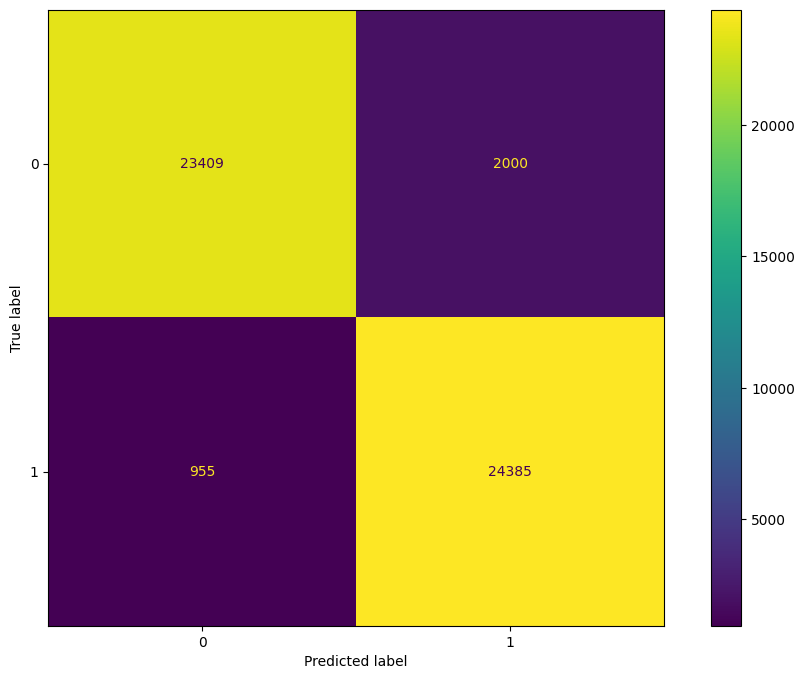

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

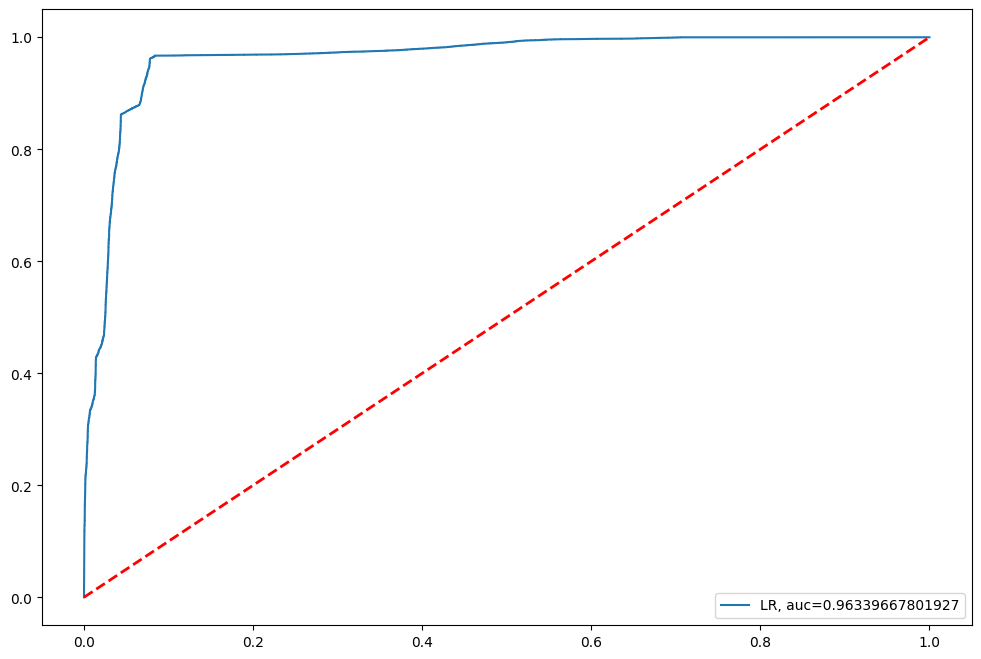

In [88]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Formulando as hipóteses

In [90]:
ProfileReport(df_balanced)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

> <h3>Hipóteses</h3> <hr>

- tipo_PAYMENT é o que a pessoa utiliza como padrão e a fraude ocorre por meio do tipo_TRANSFER

- O cliente pode fazer seus pagamentos durante um período do dia, como por exemplo durante a manhã, e a fraude ocorre durante um período diferente, como a madrugada.

- O cliente paga as duas contas no começo do mês e houve uma movimentação no final do mês, sendo uma fraude.

# Aula 4

## Árvore de Decisão

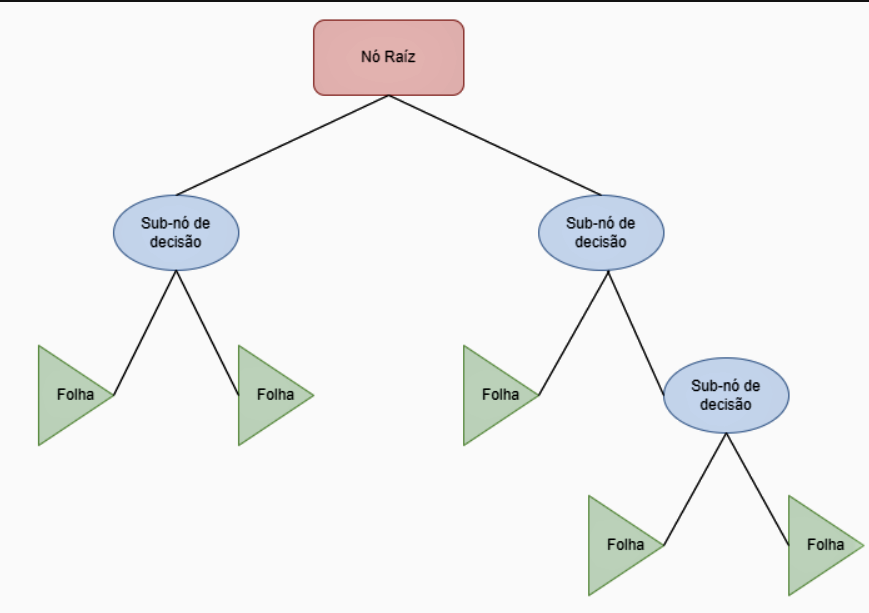

> Overfiting

Quando chegamos na folha, a última parte da árvore, podemos ter sérios problemas se o nosso modelo estiver muito bem treinado. Se colocarmos vários dados e não definirmos, por exemplo, quanto a nossa árvore crescerá, pode acontecer um problema de Overfiting, que é quando a árvore está muito bem treinada com os dados que passaremos, mas se chegam dados novos, ela não consegue reconhecê-los e os nossos resultados serão muito ruins.

Em outras palavras, ela conseguirá trabalhar muito bem com os dados que tínhamos antes, mas quando chegam novos dados, ela não consegue. Isso é o overfiting. Para que isso não ocorra, definimos uma poda para a nossa árvore, que seria uma profundidade máxima.

In [94]:
from sklearn.tree import DecisionTreeClassifier

dt =  DecisionTreeClassifier(max_depth = 5, random_state=SEED)

model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

# max_depth = para definir o limite da folha para mitigar o overfiting

Acurácia: 0.9595065912628821
Precisão: 0.9379678742053192
Recall: 0.9839779005524862
F1: 0.9604221635883906


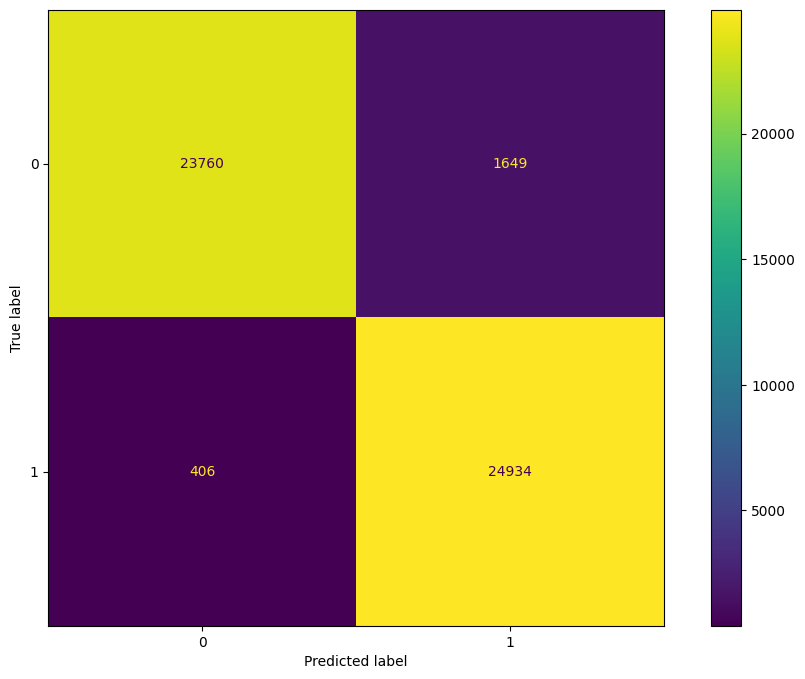

In [92]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

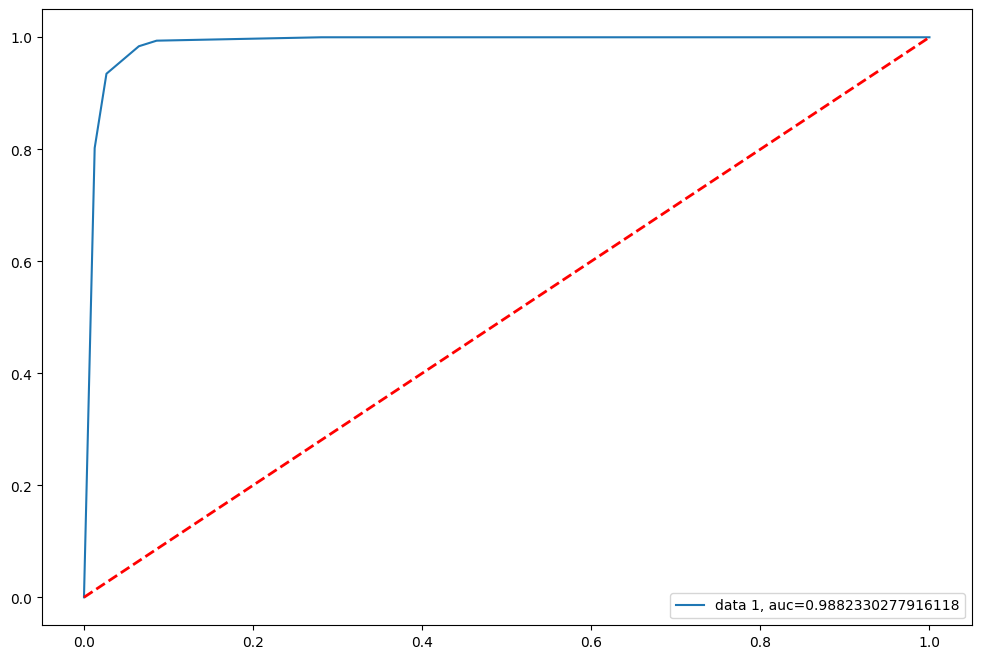

In [93]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Random Forest

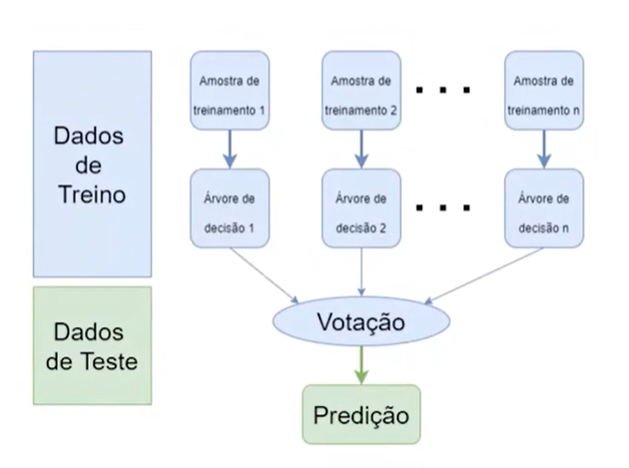

Nós tivemos bons resultados com o modelo de árvore de decisão, mas faremos a comparação com outro modelo, o Random Forest que é, basicamente, uma "Floresta Aleatória".

O Random Forest tem várias árvores de decisão. Os dados de treino e teste estão separados e são inseridos nessas várias árvores. São várias amostras de treinamento que temos dentro dele e que são inseridas nessas árvores de 1 a n, sendo que o n representa o número de árvores que queremos. Depois que acontece o treinamento, eles elegem qual foi a melhor árvore, isto é, a que teve os melhores resultados no uso dos dados de teste.

Em tese, o Random Forest é melhor que o algoritmo de decision tree. Vamos fazer um teste para descobrir se é verdade. Primeiro, o importaremos do sklearn.

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth= 5, random_state = SEED)

model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

# Ao utilizar o modelo Random Forest, podemos escolher a quantidade de árvores de decisão a serem criadas. No scikit-learn, podemos controlar a quantidade através do parâmetro n_estimators.

Acurácia: 0.9722950205915387
Precisão: 0.9787182974637971
Recall: 0.9655090765588004
F1: 0.9720688148118718


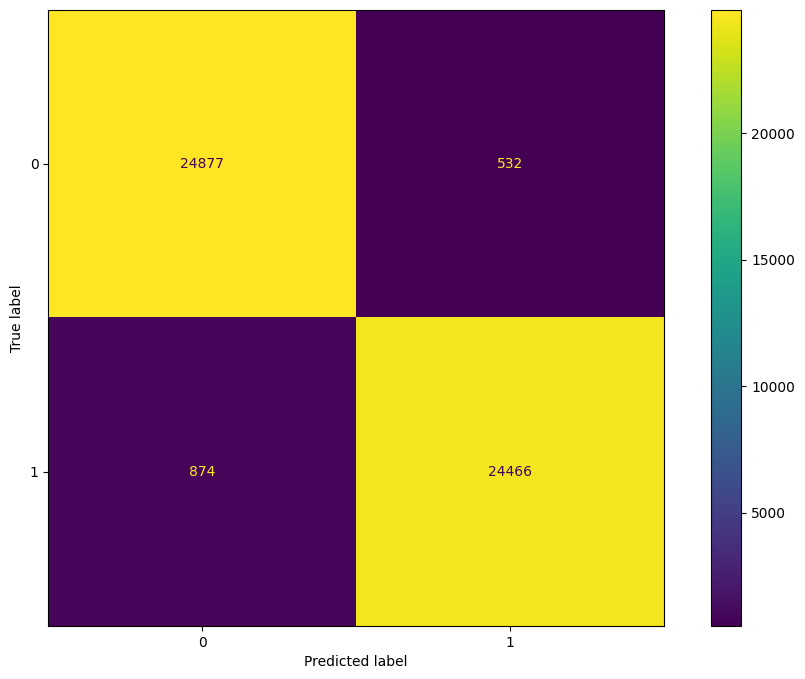

In [96]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

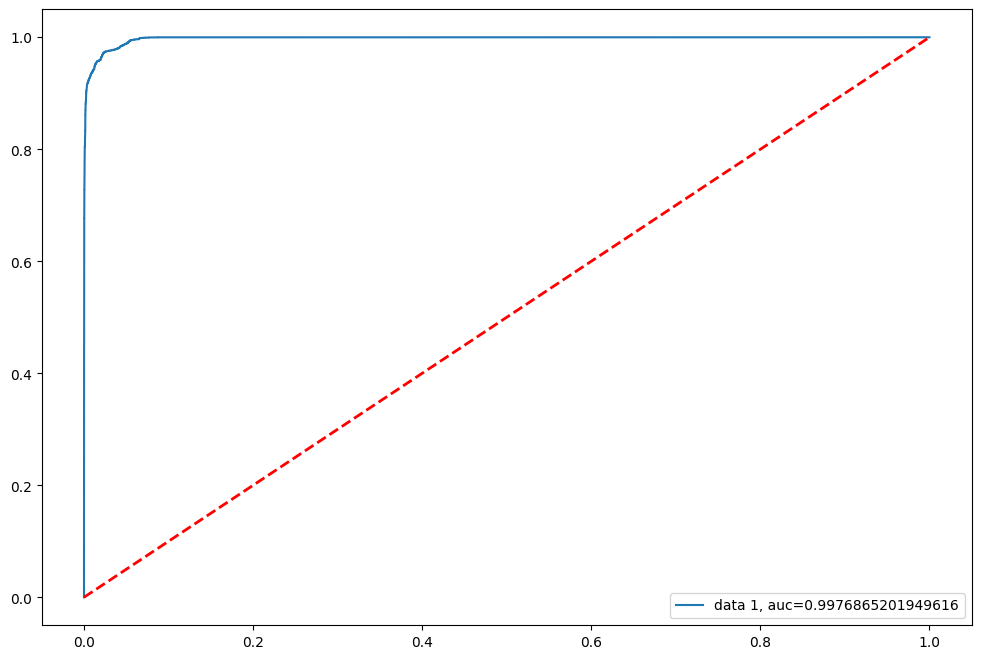

In [97]:
y_pred_proba =  rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Análise de Métricas

In [98]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]

LogisticRegression
****Resultados****
Accuracy: 0.9417722516699837
Precision: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975
DecisionTreeClassifier
****Resultados****
Accuracy: 0.9595065912628821
Precision: 0.9379678742053192
Recall: 0.9839779005524862
F1: 0.9604221635883906
RandomForestClassifier
****Resultados****
Accuracy: 0.9722950205915387
Precision: 0.9787182974637971
Recall: 0.9655090765588004
F1: 0.9720688148118718


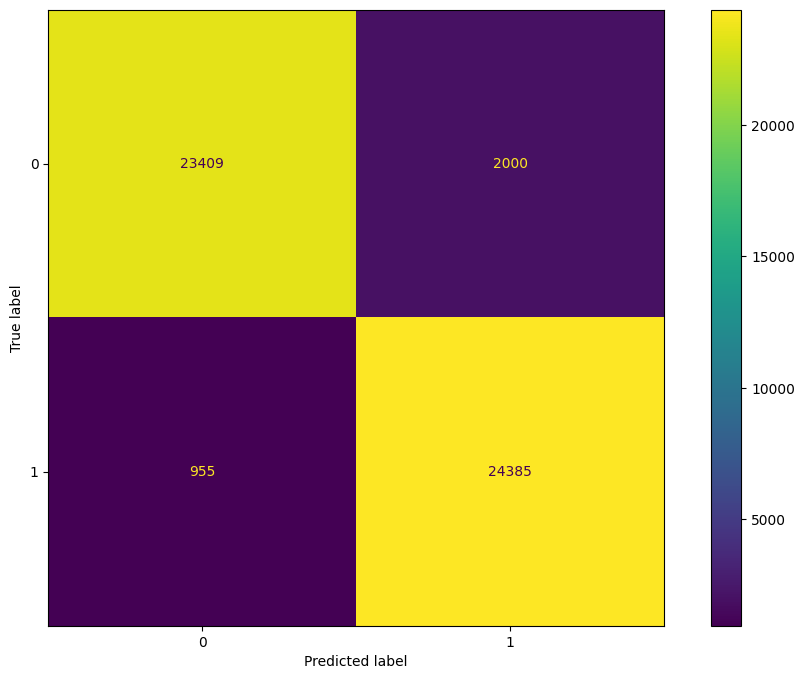

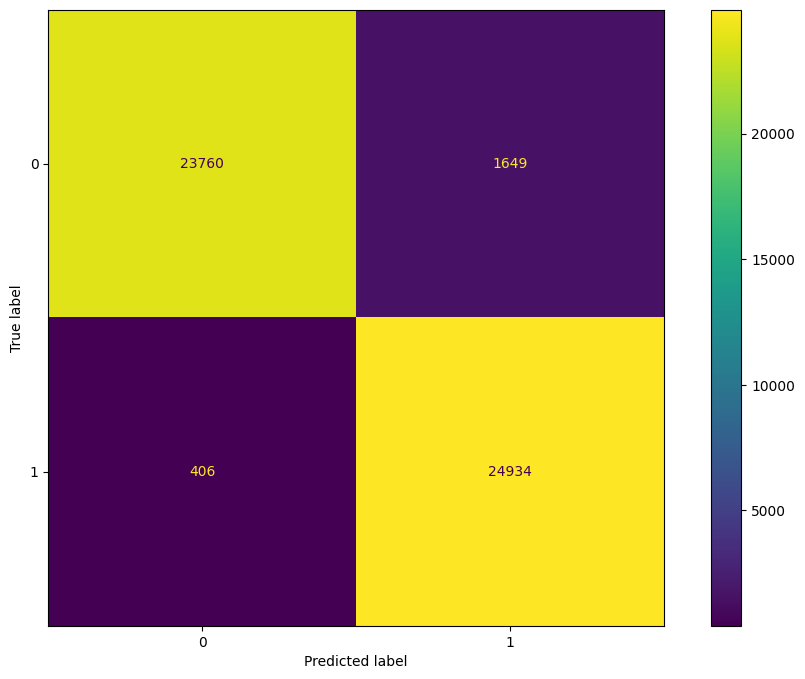

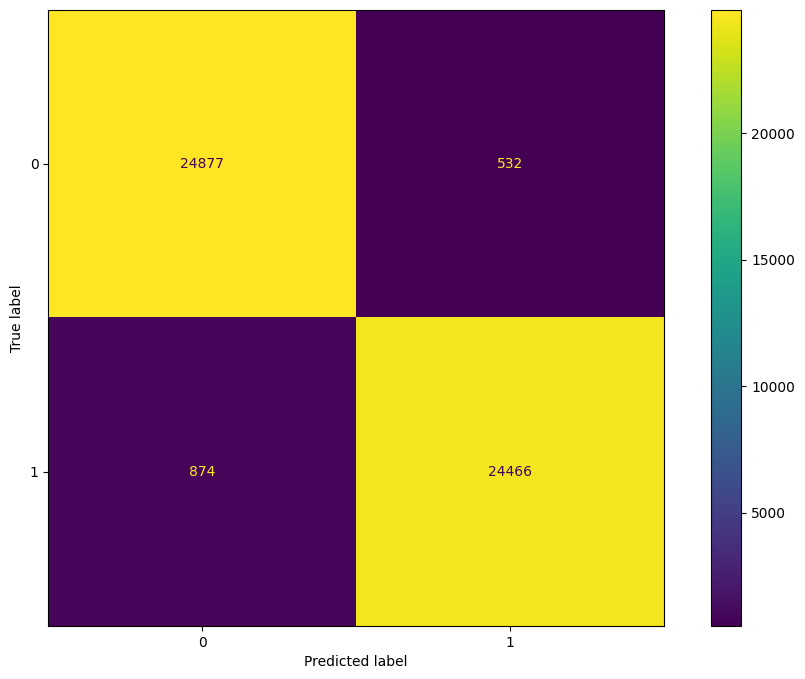

In [100]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(x_test)
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
  print("Precision:", metrics.precision_score(y_test, y_pred))
  print("Recall:", metrics.recall_score(y_test, y_pred))
  print("F1:", metrics.f1_score(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

O modelo escolhido foi o <b>Random Forest</b>

# Aula 5

## Melhorando o modelo

Melhorar o modelo [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) utilizando o método [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Ao selecioná-lo, seremos redirecionados à documentação em uma nova guia. Na documentação, encontraremos uma série de parâmetros com suas respectivas descrições em inglês, podemos utilizar, com o botão direito do mouse, a função para traduzir o texto para o português.
<br>
<br>
Essa tradução não será suficiente para uma compreensão completa, mas ela ajuda, por exemplo, no "n_estimators" que é o número de árvores da floresta que já conhecíamos e é fácil de entender, porque na descrição transcrita, está escrito exatamente isso: O número de árvores na floresta.
<br>
<br>
Já sabemos que o n_estimators tem valor de default 100, que é um bom valor, mas que poderia variar, já que quanto mais árvores temos, mais opções de escolha. Isso é crucial para o momento em que fizermos a votação. Aumentando o número de árvores, teremos um modelo melhor e, consequentemente, um resultado melhor.
<br>
<br>
Temos também o parâmetro de critério e nele o "gini" e o "entropy" como possibilidades. O gini serve basicamente para medir com qual frequência um elemento é escolhido aleatoriamente e identificado incorretamente, ou seja, quantas vezes ele estaria incorreto a partir da escolha que foi feita.
<br>
<br>
Já o entropy nos fornece um valor médio de quantas perguntas binárias, sim ou não, precisamos fazer para as decisões da árvore para identificarmos a saída da fonte, isto é, até chegarmos em uma folha. Basicamente, quanto maior a entropia, maior o conteúdo da informação que teremos na nossa árvore.
<br>
<br>
Já conversamos também sobre o max_depht. Aqui no documento, o default dele consta como none, portanto, se estivéssemos o deixado sem nada antes, a nossa árvore teria ido até o final e chegado, provavelmente, em o overfitting. É sempre interessante manter um número no default para fazermos a poda e não precisa ser necessariamente o 5, que já usamos, pode ser outro valor máximo.
<br>
<br>
Também temos os valores mínimos, min_samples_split que se refere aos números mínimos dentro da amostra para dividir um nó e min_samples_leaf se refere aos números mínimos de amostra necessárias dentro de um nó. Aqui no documento, o default do min_samples_split é 2 e o do min_samples_leaf, é 1.
<br>
<br>
Nós utilizaremos também o max_features que nos oferece três opções: o auto, o sqrt e o log2. O auto e o sqrt pegarão o número máximo de variáveis e aplicarão uma raiz quadrada na quantidade de variáveis de treinamento. Assim, calcularemos o valor de max_features, que são nossas variáveis máximas.
<br>
<br>
Já o log_2 pegará as variáveis de treinamento e aplicará um log na base 2. Também podemos colocar um número inteiro e um valor numérico, desta maneira, ele não pegará as variáveis de treinamento e colocará, diretamente, o valor inteiro que indicamos.
<br>
<br>
Outro parâmetro importante é o bootstrap que é booleano e tem como default o true. Vamos retornar ao Colab. Na árvore no Random Forest, tínhamos a "Amostra de treinamento 1", "Amostra de treinamento 2" e "Amostra de treinamento n" na primeira parte da árvore (a parte mais alta).

In [101]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [102]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [103]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [104]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)

In [105]:
%%time
rcv = random_cv.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


CPU times: user 38.7 s, sys: 628 ms, total: 39.3 s
Wall time: 3min 19s


In [107]:
pd.DataFrame(rcv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      35.449003      1.239632         0.973587        0.216527   
1      13.166588      0.165091         0.599520        0.005829   
2      12.370936      0.859648         0.457801        0.098131   
3      24.479661      1.291094         0.864171        0.238322   
4      16.734779      0.300550         0.711114        0.067496   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                120                       4                      2   
1                120                       4                      2   
2                 40                       8                      1   
3                100                       8                      4   
4                160                       6                      2   

  param_max_features param_max_depth param_criterion param_bootstrap  \
0               auto               9            gini           False   
1               auto               2            gini           False   
2               sqrt               7         entropy           False   
3               log2               9         entropy            True   
4               log2               2            gini           False   

                                              params  split0_test_score  \
0  {'n_estimators': 120, 'min_samples_split': 4, ...           0.990748   
1  {'n_estimators': 120, 'min_samples_split': 4, ...           0.914223   
2  {'n_estimators': 40, 'min_samples_split': 8, '...           0.981379   
3  {'n_estimators': 100, 'min_samples_split': 8, ...           0.992374   
4  {'n_estimators': 160, 'min_samples_split': 6, ...           0.914223   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999054           0.991724         0.993842        0.003707   
1           0.933083           0.928913         0.925407        0.008089   
2           0.999823           0.972245         0.984482        0.011470   
3           0.999438           0.988502         0.993438        0.004528   
4           0.929182           0.928913         0.924106        0.006989   

   rank_test_score  
0                1  
1                4  
2                3  
3                2  
4                5

In [106]:
rcv.best_params_

{'n_estimators': 120,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini',
 'bootstrap': False}

## Resultados Finais

In [108]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acurácia: 0.9917633845001872
Precisão: 0.9907451165721487
Recall: 0.9927782162588792
F1: 0.9917606244579357


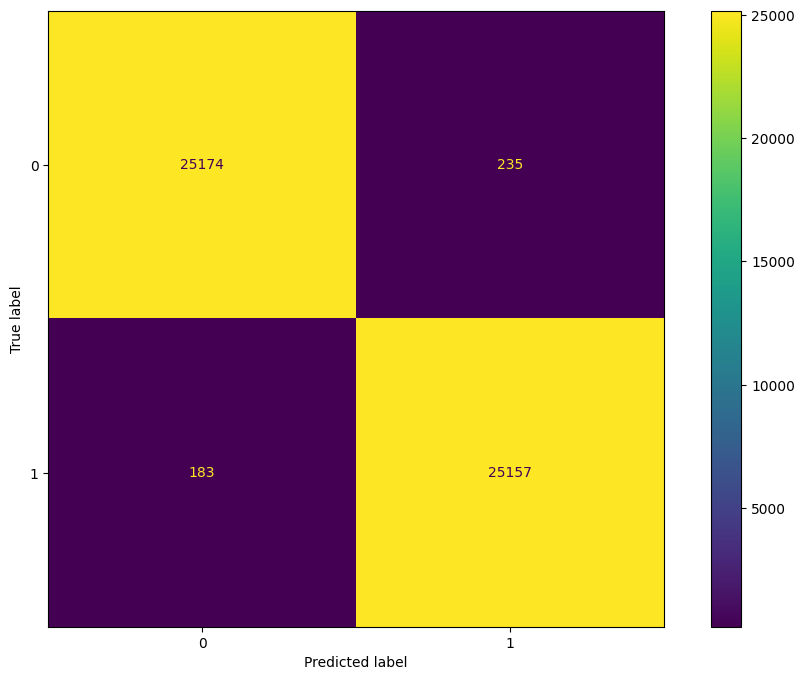

In [109]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

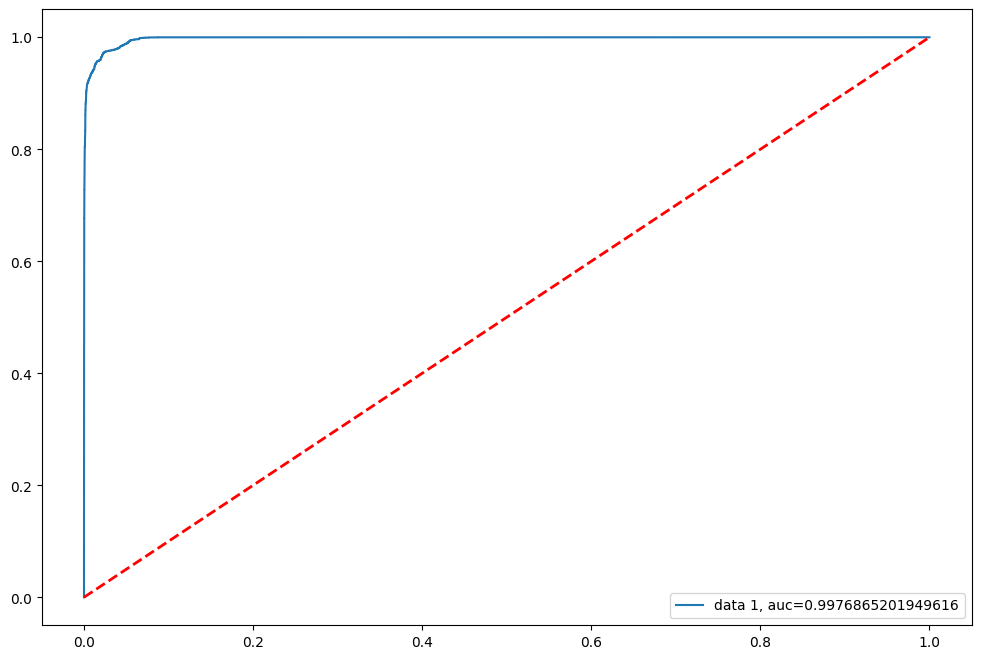

In [110]:
y_pred_proba =  rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Conclusão

Conseguimos diminuir os falsos positivos para 183 e os falsos negativos para 235. Significa que estamos deixando passar apenas 183 fraudes e estamos ligando para apenas 235 pessoas. Ao fazerem compras essas pessoas recebem pop-up questionando se a compra é uma fraude.

É possível melhorar ainda mais esse modelo com outros parâmetros, mas ele já está ótimo. Anteriormente, na nossa matriz de confusão do Random Forest, tínhamos 652 falsos positivos e passamos para 183. Além disso, tínhamos 750 falsos negativos e passamos para 235.

Portanto, conseguimos fazer um modelo com bons resultados e agora podemos apresentá-los ao nosso chefe. Esse modelo é o melhor dentre três, e o que escolhemos e fizemos ainda mais melhorias. Agora, passaremos para as conclusões das hipóteses.